In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pca import pca
from gmm import *
import copy

In [3]:
# load synthetic data from MATLAB data file

variables = dict()
loadmat('synthData.mat', variables)

data = variables['data']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Transformed Data After PCA')

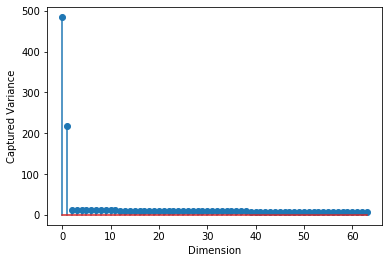

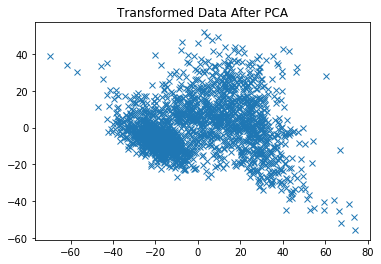

In [4]:
# run PCA

new_data, variances, eigenvectors = pca(data)

plt.figure()
plt.stem(variances.ravel())
plt.xlabel('Dimension')
plt.ylabel('Captured Variance')


plt.figure()
plt.plot(new_data[0,:], new_data[1,:], 'x')
plt.title('Transformed Data After PCA')

In [5]:
# truncate dimensions to just the first two
small_data = new_data[:2, :]

# split data for validation
d, n = small_data.shape

# use fraction of data for training

train_inds = np.random.rand(n) < 0.5

train_data = small_data[:, train_inds]
val_data = small_data[:, ~train_inds]

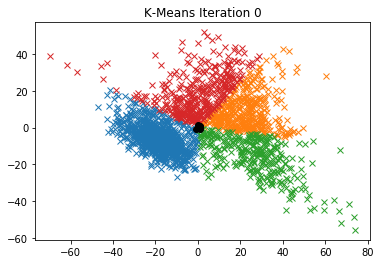

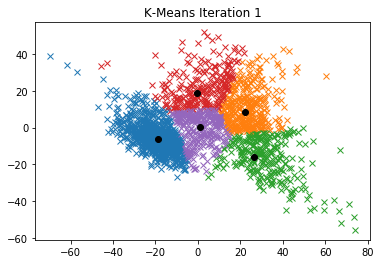

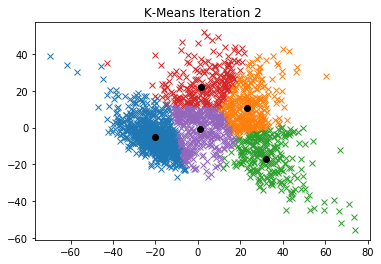

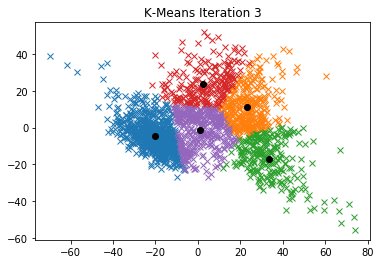

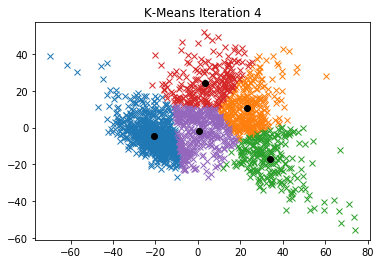

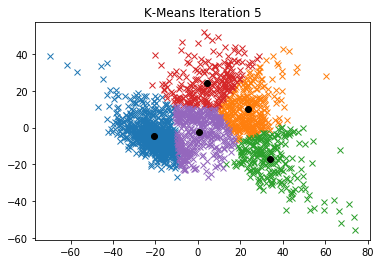

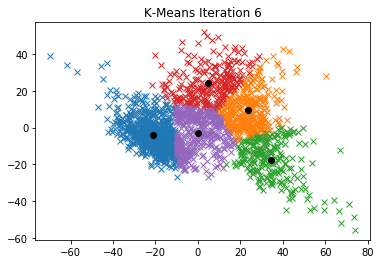

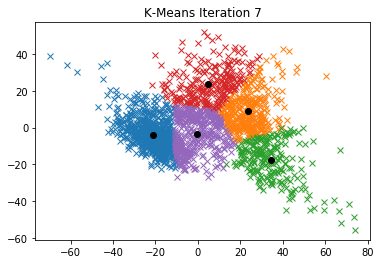

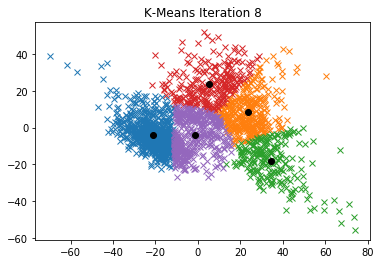

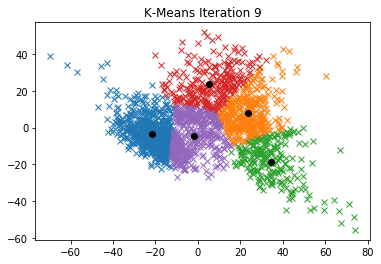

Text(0.5, 1.0, 'K-Means Iteration 10')

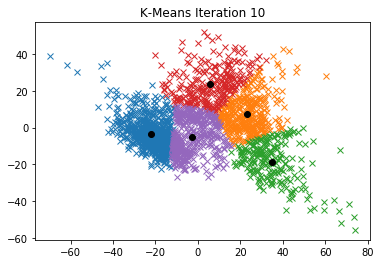

In [6]:
# Run k-means

num_clusters = 5

means = np.random.randn(d, num_clusters)

symbols = ['xr', 'og', 'sb', '*m', '+c']

for iter in range(10):
    # compute memberships
    distance = np.sum(small_data ** 2, 0, keepdims=True) + np.sum(means ** 2, 0, keepdims=True).T - \
               2 * means.T.dot(small_data)
    
    memberships = np.argmin(distance, 0)
    
    plot_k_means(small_data, means, memberships)
    plt.title("K-Means Iteration %d" % iter)
    plt.show()
    
    # update means

    for i in range(num_clusters):
        if np.any(memberships == i):
            means[:, i] = np.mean(small_data[:, memberships == i], 1)


plot_k_means(small_data, means, memberships)
plt.title("K-Means Iteration 10")

Start GMM with 1 clusters. For this set of data:
dimension "d" is 2, data points "n" is 1031
Processing Iterations...
change (0.00E+00) is smaller than tolerance (1.00E-04).
Aborting loops...
Complete 2 iterations.

Start GMM with 2 clusters. For this set of data:
dimension "d" is 2, data points "n" is 1031
Processing Iterations...
change (9.11E-05) is smaller than tolerance (1.00E-04).
Aborting loops...
Complete 50 iterations.

Start GMM with 3 clusters. For this set of data:
dimension "d" is 2, data points "n" is 1031
Processing Iterations...
change (9.27E-05) is smaller than tolerance (1.00E-04).
Aborting loops...
Complete 66 iterations.

Start GMM with 4 clusters. For this set of data:
dimension "d" is 2, data points "n" is 1031
Processing Iterations...
change (9.93E-05) is smaller than tolerance (1.00E-04).
Aborting loops...
Complete 296 iterations.

Start GMM with 5 clusters. For this set of data:
dimension "d" is 2, data points "n" is 1031
Processing Iterations...
change (9.99E-

Text(0, 0.5, 'Log Likelihood of Val. Data')

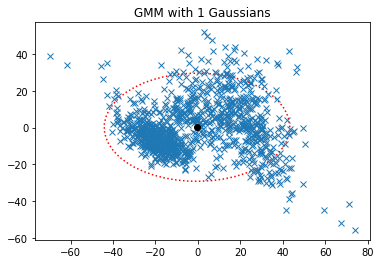

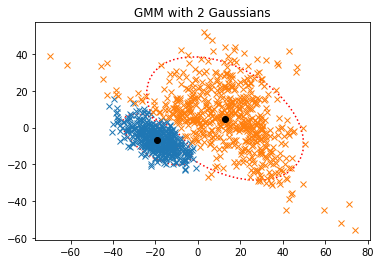

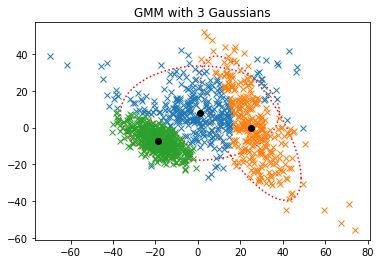

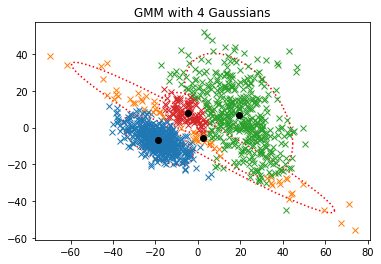

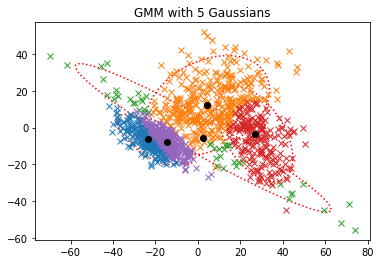

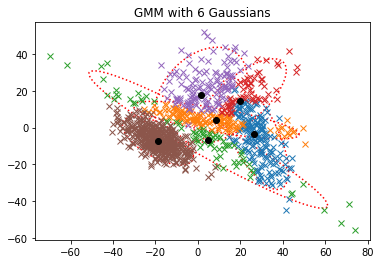

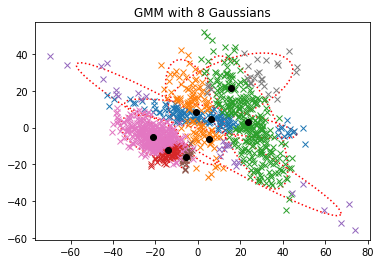

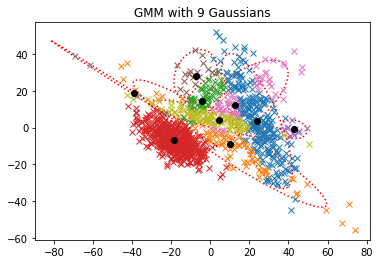

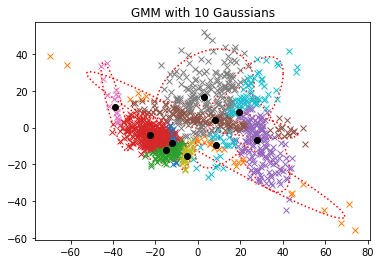

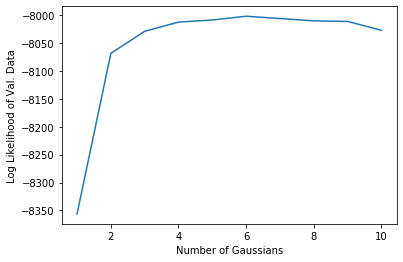

In [8]:
# Try Gaussian mixture models with different numbers of Gaussians

num_clusters = [1, 2, 3, 4, 5, 6, 8, 9, 10]

val_likelihood = []

all_means = []
all_sigmas = []
all_clust_probs = []

for k in range(len(num_clusters)):
    plt.figure()
    means, sigmas, clust_probs = gmm(train_data, num_clusters[k], plot='final')
    
    val_likelihood.append(gmm_ll(val_data, means, sigmas, clust_probs))

    all_means.append(means)
    all_sigmas.append(sigmas)
    all_clust_probs.append(clust_probs)

# plot likelihoods

plt.figure()

plt.plot(num_clusters, val_likelihood)
plt.xlabel('Number of Gaussians')
plt.ylabel('Log Likelihood of Val. Data')